In [9]:
from graphviz import Digraph
from collections import deque

In [2]:
def example(num):
    g = Graph()
    if num == 1:
        g.node("A")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "B")
    elif num == 2:
        g.edge("A", "B")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "E")
        g.edge("A", "E")
    elif num == 3:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
    elif num == 4:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
        g.edge("E", "Z")
        g.edge("C", "Z")
        g.edge("B", "A")
    elif num == 5:
        width = 8
        height = 4
        for L1 in range(height-1):
            L2 = L1 + 1
            for i in range(width-(height-L1-1)):
                for j in range(width-(height-L2-1)):
                    node1 = str(L1)+"-"+str(i)
                    node2 = str(L2)+"-"+str(j)
                    g.edge(node1, node2)
    else:
        raise Exception("no such example")
    return g

(B, C, D)


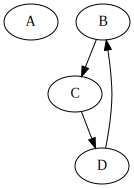

In [10]:
# https://tinyurl.com/2p82uuvz

class Graph:
    def __init__(self):
        # name => Node
        self.nodes = {}
        
        # Nodes we've been during search
        self.visited = set()

    def node(self, name):
        node = Node(name)
        self.nodes[name] = node
        node.graph = self
    
    def edge(self, src, dst):
        # automatically add missing nodes
        for name in [src, dst]:
            if not name in self.nodes:
                self.node(name)
        self.nodes[src].children.append(self.nodes[dst])

    def _repr_svg_(self):
        # draw nodes+edges, non-recursively!
        g = Digraph()
        for n in self.nodes:
            g.node(n)
            for child in self.nodes[n].children:
                g.edge(n, child.name)
        return g._repr_image_svg_xml()
    
    def find_dfs(self, src, dst):
        # clear visited
        self.visited.clear()
        # start the recursive search
        return self.nodes[src].find_dfs(self.nodes[dst])
    
    def find_bfs(self, src, dst):
        return self.nodes[src].find_bfs(self.nodes[dst])

class Node:
    def __init__(self, name):
        self.name = name
        self.children = []
        self.graph = None # back reference
        self.finder_parent = None
        
    def __repr__(self):
        return self.name
    
    def find_dfs(self, dst):
        self.graph.visited.add(self)
        
        if self == dst:
            return (self.name,)

        for child in self.children:
            if not child in self.graph.visited:
                childpath = child.find_dfs(dst)
                if childpath:
                    return (self.name,) + childpath

        return None

    # version 1: return True/False (is there a path?)
    # version 2: return a tuple showing what the path is
    def find_bfs(self, dst):
        todo = deque([self]) # tasks to complete (a node to visit) -- start from beginning
        added = set([self])
        
        while len(todo) > 0:
            # 1. do the highest priority task (visit a node)
            curr_node = todo.popleft()
            #print("CURR:", curr_node)
            if curr_node == dst:
                return curr_node

            # 2. add any newly discovered work to the todo list
            for child in curr_node.children:
                if not child in added:
                    todo.append(child)
                    added.add(child)
                    child.finder_parent = curr_node
            #print("TODO:", todo)
        return None
    
    def backtrace(self):
        path = []
        curr = self
        while curr != None:
            path.append(curr)
            curr = curr.finder_parent
        return tuple(reversed(path))
    
g = example(1)
dst = g.find_bfs("B", "D")
print(dst.backtrace())
g

# Queueing Data Structures

In [4]:
# double-edge queue
# will be fast for FIFO queue
from collections import deque    # deque is a class

# heap queue
# will will be fast for a priority queue
import heapq    # have some functions for using a list more efficiently

In [6]:
d = deque([])
d.append(1) # FAST -- O(1), like a list
d.append(2)
d.append(3)
d

deque([1, 2, 3])

In [7]:
x = d.pop() # from the end -- FAST -- O(1) like a list
print(x)
y = d.popleft() # from the beginning -- FAST -- O(1)
print(y)

3
1


In [8]:
d

deque([2])

In [11]:
items = []

for x in [5,3,1,4,2]:
    heapq.heappush(items, x) # fairly fast -- O(log N)
items # guarantee: the smallest item is at the beginning

[1, 2, 3, 5, 4]

In [12]:
while len(items) > 0:
    x = heapq.heappop(items) # fairly fast -- O(log N)
    # guarantee: the new smallest item is at the beginning now
    print(x)
    print(items)

1
[2, 4, 3, 5]
2
[3, 4, 5]
3
[4, 5]
4
[5]
5
[]


In [ ]:
# heapq.heappop -- give the smallest value
# deque.popleft -- can pop index 0, very efficiently
# list.pop -- can pop any index, will be slow for small indexes

# Benchmarking Queueing Structures

Text(0, 0.5, 'Microseconds')

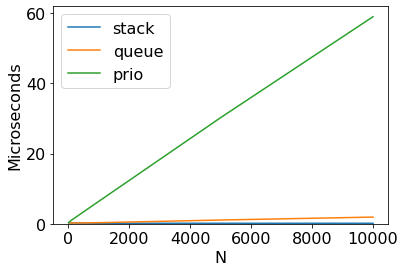

In [17]:
import time, random
import pandas as pd
import matplotlib.pyplot as plt

iters = 1000

def benchmark_microsec(data, pattern):
    t0 = time.time()
    # measure bad ways to implement the patterns (all with a list!)
    for i in range(iters):
        if pattern == "stack":
            data.append(i % 10)
            _ = data.pop(-1) # end
        
        elif pattern == "queue":
            data.append(i % 10)
            _ = data.pop(0) # beginning
            
        elif pattern == "prio":
            data.append(i % 10)
            data.sort() # O(N log N)
            _ = data.pop(0) # beginning

        # TODO: priority queue
        else:
            raise Exception("pattern not supported")
    t1 = time.time()
    return (t1-t0) / iters * 1e6

df = pd.DataFrame()
for N in [10,100,1000,5000,10000]:
    df.loc[N,"stack"] = benchmark_microsec([1]*N, "stack")
    df.loc[N,"queue"] = benchmark_microsec([1]*N, "queue")
    df.loc[N,"prio"] = benchmark_microsec([1]*N, "prio") # TODO: build using heappush

plt.rcParams["font.size"] = 16
df.plot.line(ylim=0)
plt.xlabel("N")
plt.ylabel("Microseconds")
# TODO: increase iters...

Text(0, 0.5, 'Microseconds')

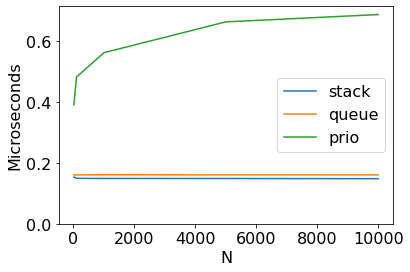

In [19]:
import time, random
import pandas as pd
import matplotlib.pyplot as plt

iters = 1000000

def benchmark_microsec(data, pattern):
    t0 = time.time()
    # measure bad ways to implement the patterns (all with a list!)
    for i in range(iters):
        if pattern == "stack":
            data.append(i % 10)
            _ = data.pop(-1) # end
        
        elif pattern == "queue":
            data.append(i % 10)
            _ = data.popleft() # beginning
            
        elif pattern == "prio":
            heapq.heappush(data, i % 10)
            _ = heapq.heappop(data) # smallest

        else:
            raise Exception("pattern not supported")
    t1 = time.time()
    return (t1-t0) / iters * 1e6

df = pd.DataFrame()
for N in [10,100,1000,5000,10000]:
    df.loc[N,"stack"] = benchmark_microsec([1]*N, "stack")
    df.loc[N,"queue"] = benchmark_microsec(deque([1]*N), "queue")
    df.loc[N,"prio"] = benchmark_microsec([1]*N, "prio") # TODO: build using heappush

plt.rcParams["font.size"] = 16
df.plot.line(ylim=0)
plt.xlabel("N")
plt.ylabel("Microseconds")
# TODO: increase iters...